<a href="https://colab.research.google.com/github/Namtk214/AIO-Homework/blob/main/Module2_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [3]:
# Question 1
def compute_mean(x):
    return np.mean(x)
X = [2, 0, 2, 2, 7, 4, -2, 5, -1, -1]
print(compute_mean(X))

1.8


In [4]:
# Question 2:
def compute_median(x):
    x.sort()
    if len(x) % 2 == 0:
        return (x[len(x) // 2] + x[len(x) // 2 - 1]) / 2
    else:
        return x[len(x) // 2]
X = [1, 5, 4, 4, 9, 13]
print(compute_median(X))

4.5


In [5]:
# Question 3
def compute_std(x):
    return np.std(x)
X = [171, 176, 155, 167, 169, 182]
print(compute_std(X))


8.32666399786453


In [7]:
# Question 4
def compute_correlation_coefficient(x, y):
    return np.corrcoef(x, y)
X = np.asarray ([ -2 , -5 , -11 , 6 , 4 , 15 , 9])
Y = np.asarray ([4 , 25 , 121 , 36 , 16 , 225 , 81])
print(compute_correlation_coefficient(X, Y))

[[1.         0.42026333]
 [0.42026333 1.        ]]


In [8]:
!gdown 1iA0WmVfW88HyJvTBSQDI5vesf-pgKabq

Downloading...
From: https://drive.google.com/uc?id=1iA0WmVfW88HyJvTBSQDI5vesf-pgKabq
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 14.0MB/s]


In [11]:
import pandas as pd
data = pd.read_csv('/content/advertising.csv')
x = data['TV']
y = data['Radio']
print(compute_correlation_coefficient(x, y))

[[1.         0.05480866]
 [0.05480866 1.        ]]


In [12]:
features = ['TV', 'Radio', 'Newspaper']

for feature_1 in features:
    for feature_2 in features:
        correlation_coefficient = compute_correlation_coefficient(data[feature_1], data[feature_2])
        print(f"Correlation coefficient between {feature_1} and {feature_2}: {correlation_coefficient}")


Correlation coefficient between TV and TV: [[1. 1.]
 [1. 1.]]
Correlation coefficient between TV and Radio: [[1.         0.05480866]
 [0.05480866 1.        ]]
Correlation coefficient between TV and Newspaper: [[1.         0.05664787]
 [0.05664787 1.        ]]
Correlation coefficient between Radio and TV: [[1.         0.05480866]
 [0.05480866 1.        ]]
Correlation coefficient between Radio and Radio: [[1. 1.]
 [1. 1.]]
Correlation coefficient between Radio and Newspaper: [[1.         0.35410375]
 [0.35410375 1.        ]]
Correlation coefficient between Newspaper and TV: [[1.         0.05664787]
 [0.05664787 1.        ]]
Correlation coefficient between Newspaper and Radio: [[1.         0.35410375]
 [0.35410375 1.        ]]
Correlation coefficient between Newspaper and Newspaper: [[1. 1.]
 [1. 1.]]


In [15]:
x = data['Radio']
y = data['Newspaper']
print(compute_correlation_coefficient(x, y))

[[1.         0.35410375]
 [0.35410375 1.        ]]


In [16]:
data_corr_coed = data.corr()
print(data_corr_coed)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


In [22]:
!pip install seaborn
!pip install matplotlib

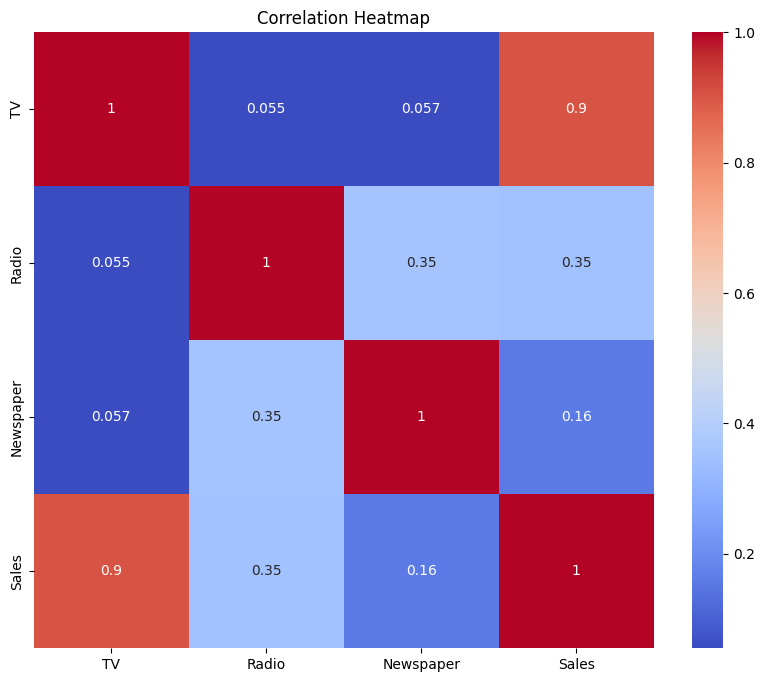

In [25]:
#Question 9:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/advertising.csv')
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [26]:
#Question 10:
!gdown 1jh2p2DlaWsDo_vEWIcTrNh3mUuXd-cw6

Downloading...
From: https://drive.google.com/uc?id=1jh2p2DlaWsDo_vEWIcTrNh3mUuXd-cw6
To: /content/vi_text_retrieval.csv
100% 201k/201k [00:00<00:00, 108MB/s]


In [40]:
#Question 10:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
vi_data_df = pd.read_csv('/content/vi_text_retrieval.csv')
context = vi_data_df['text']
context = [doc.lower() for doc in context]

tfidf_vectorizer = TfidfVectorizer()
context_embedded = tfidf_vectorizer.fit_transform(context).toarray()
print(context_embedded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [41]:
querry_embedded = tfidf_vectorizer.transform([question.lower()]).toarray()
cosine_similarities = cosine_similarity(querry_embedded, context_embedded).reshape((-1,))


In [43]:
def tfidf_search(question, tfidf_vectorizer, top_d=5):
  querry_embedded = tfidf_vectorizer.transform([question.lower()]).toarray()
  cosine_similarities = cosine_similarity(querry_embedded, context_embedded).reshape((-1,))
  result = []
  for idx in cosine_similarities.argsort()[-top_d:][::-1]:
    doc_score = {
        'id': idx,
        'cosine_score': cosine_similarities[idx]
    }
    result.append((idx, cosine_similarities[idx]))
  return result
question = vi_data_df.iloc[0]['question']
result = tfidf_search(question, tfidf_vectorizer, top_d=5)
result[0][1]

0.6279910475266974

In [52]:
def corr_search(question, tfidf_vectorizer, top_d=5):
  querry_embedded = tfidf_vectorizer.transform([question.lower()]).toarray()
  corr_scores = compute_correlation_coefficient(querry_embedded, context_embedded)
  corr_scores = corr_scores[0, 1:]
  result = []
  for idx in cosine_similarities.argsort()[-top_d:][::-1]:
    doc_score = {
        'id': idx,
        'corr_score': corr_scores[idx]
    }
    result.append(doc_score)
  return result
question = vi_data_df.iloc[0]['question']
result = corr_search(question, tfidf_vectorizer, top_d=5)
result[1]['corr_score']

0.20734246471973258